<a href="https://colab.research.google.com/github/AtifQureshi110/image_to_text/blob/main/image_to_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers -q

In [8]:
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
import torch
from PIL import Image
import warnings
from PIL import Image
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer

# Suppress the specific warning about attention_mask
warnings.filterwarnings("ignore", category=UserWarning, message=".*attention_mask.*")


In [3]:
model_id = "nlpconnect/vit-gpt2-image-captioning"

In [9]:
model_id = "nlpconnect/vit-gpt2-image-captioning"
model = VisionEncoderDecoderModel.from_pretrained(model_id)
feature_extractor = ViTImageProcessor.from_pretrained(model_id)
tokenizer = AutoTokenizer.from_pretrained(model_id)

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_featur

In [11]:
max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}
def predict_step(image_paths):
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds

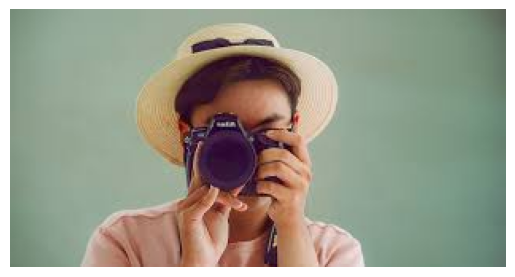

In [12]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and display the image
image_path = '/content/drive/MyDrive/BERT/Transformers/images/women.jpg'
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()


In [14]:
image_info= predict_step(['/content/drive/MyDrive/BERT/Transformers/images/women.jpg'])

In [15]:
image_info

['a man wearing a hat holding a camera']

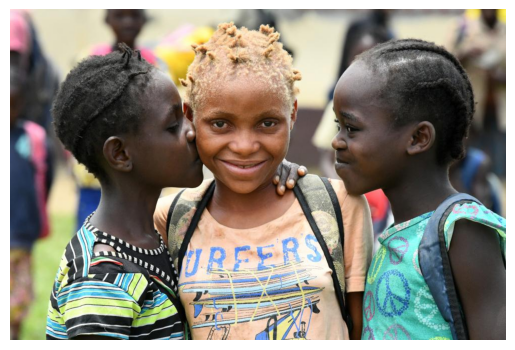

In [18]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and display the image
image_path = '/content/drive/MyDrive/BERT/Transformers/images/grils.jpg'
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()


In [16]:
image_info= predict_step(['/content/drive/MyDrive/BERT/Transformers/images/grils.jpg'])

In [17]:
image_info

['two young girls standing next to each other']

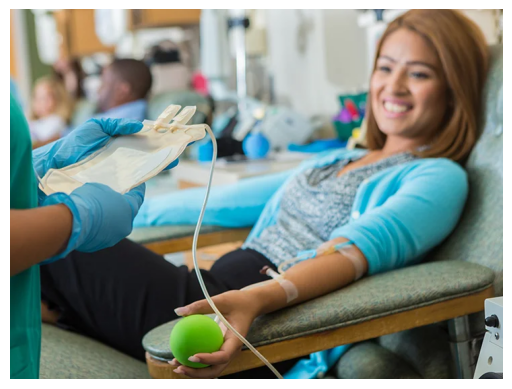

In [20]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and display the image
image_path = '/content/drive/MyDrive/BERT/Transformers/images/young.png'
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()


In [21]:
image_info= predict_step(['/content/drive/MyDrive/BERT/Transformers/images/young.png'])

In [22]:
image_info

['a woman sitting on a couch playing with a wii remote']